# Exploratory Data Analysis on Haberman Dataset

# Objective

To identify datapoints, features and class of the Haberman dataset. To perform univariate and bivariate analysis on this dataset. To understand which feature is useful in classifcation in case of univariate analysis and which two features are useful in classification in case of bivariate analysis.

# 1. Identifying datapoints, features and class 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

hb = pd.read_csv('haberman.csv')

#Number of datapoints and features
print("1) Dataset's shape:", hb.shape)
print("\n2) Dataset's columns:", hb.columns)
print("\n3) Datapoints for each class:") 
print(hb['status'].value_counts())

1) Dataset's shape: (306, 4)

2) Dataset's columns: Index(['age', 'year', 'nodes', 'status'], dtype='object')

3) Datapoints for each class:
1    225
2     81
Name: status, dtype: int64


# Conclusion:

1. There are 306 Datapoints in this dataset with 4 columns.
2. This dataset has 3 features, viz., 
    1. Age of patient at the time of operation.
    2. Patient's year of operation.
    3. Number of positive axillary nodes detected.
3. The 4th column status is the class which has entries as either 1 or 2, where:
    1. Class 1 in status is Patient survived 5 years or longer.
    2. Class 2 in status is Patient died within 5 years.
4. For class 1 there are 225 entries. For class 2 there are 81 entries.

5. Clearly, the dataset is an imbalanced one.

# 2. Univariate Analysis

# 2.1 Probability Density Function(PDF)

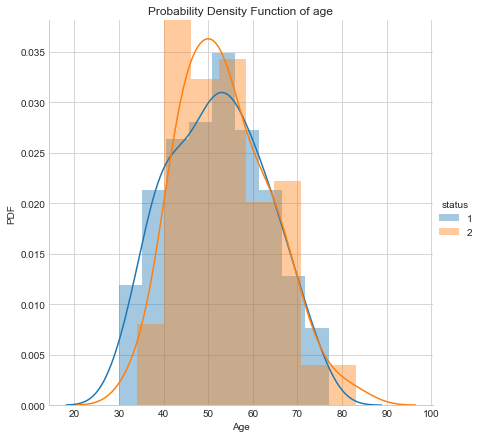

In [12]:
sns.FacetGrid(hb, hue='status', size=6).map(sns.distplot, 'age').add_legend()
plt.grid(True)
plt.title('Probability Density Function of age')
plt.xlabel('Age')
plt.ylabel('PDF')
plt.show()

# Conclusion

1. Patients who survived 5 years or longer (class = 1)
    1. Age varied between 18 to 88 years.
    2. Approx. 3.1% patients were in the age group of 52 years were maximum.

2. Patients who died within 5 years (class = 2)
    1. Age varied between 20 to 98 years.
    2. Approx. 3.6% patients were in the age group of 50 years were maximum.

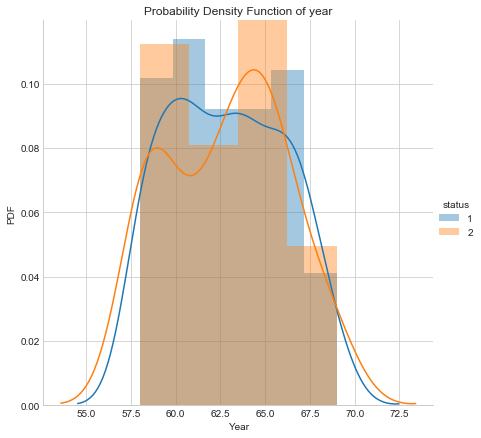

In [14]:
sns.FacetGrid(hb, hue='status', size=6).map(sns.distplot, 'year').add_legend()
plt.grid(True)
plt.title('Probability Density Function of year')
plt.xlabel('Year')
plt.ylabel('PDF')
plt.show()

# Conclusion

1. Patients who survived 5 years or longer (class = 1)
    1. Approx. 9.5% patients underwent operation in the year 1960.

2. Patients who died within 5 years (class = 2)
    1. For class = 2 patients there are two peaks seen in the PDF graph.
    2. Max patients a little more than 10% patients underwent surgery between 1962 to 1965
    3. Second max patients 8% underwent surgery between 1957 to 1960.

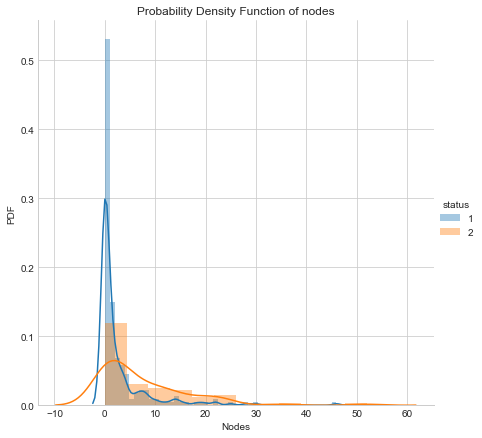

In [15]:
sns.FacetGrid(hb, hue='status', size=6).map(sns.distplot, 'nodes').add_legend()
plt.grid(True)
plt.title('Probability Density Function of nodes')
plt.xlabel('Nodes')
plt.ylabel('PDF')
plt.show()

# Conclusion

1. Patients who survived 5 years or longer (class = 1)
    1. 0 nodes are present in 30% of patients.
    2. As the nodes increase the percentage of number of patients decrease.
    3. Very less number of patients have 10 or more nodes.
2. Patients who died within 5 years (class = 2)
    1. Approx. 1-2 nodes are present in 7-8% of patients.
    2. 4% of patients have 10 nodes.
    3. As the nodes increase, the percentage of number of patients decrease.

# 2.2 Cumulative Distribution Function(CDF)

PDF for age with status 1 is:  [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
Bin Edges:  [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
PDF for age with status 2 is:  [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
Bin Edges:  [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


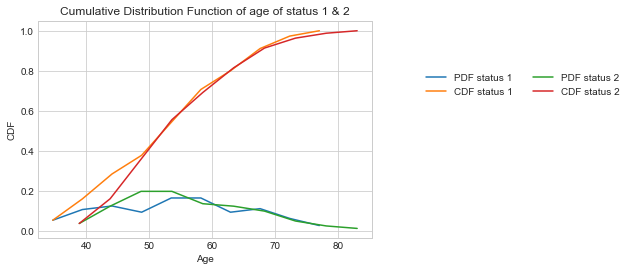

In [17]:
hb_1 = hb.loc[hb['status'] == 1]
hb_2 = hb.loc[hb['status'] == 2]

counts, bin_edges = np.histogram(hb_1['age'], bins = 10, density = True)
pdf = counts/sum(counts)
print("PDF for age with status 1 is: ",pdf)
print("Bin Edges: ",bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF status 1')
plt.plot(bin_edges[1:], cdf, label='CDF status 1')

counts, bin_edges = np.histogram(hb_2['age'], bins = 10, density = True)
pdf = counts/sum(counts)
print("PDF for age with status 2 is: ",pdf)
print("Bin Edges: ",bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF status 2')
plt.plot(bin_edges[1:], cdf, label='CDF status 2')
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8),  shadow=True, ncol=2)
plt.title('Cumulative Distribution Function of age of status 1 & 2')
plt.xlabel('Age')
plt.ylabel('CDF')
plt.grid(True)
plt.show()

# Conclusion

1. For status 1, out of 225 patients: 
    1. 40% patients have age <= 50 years.
    2. 75% patients have age <= 60 years.
2. For status 2, out of 81 patients:
    1. 40% patients have age <= 50 years.
    2. 75% patients have age <= 60 years.
    
We observe that same trend is followed by patients of both status 1 & 2 from age 50 years and more. For age below 50 years patients age and status varies.

PDF for year with status 1 is:  [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
Bin Edges:  [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF for year with status 2 is:  [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
Bin Edges:  [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


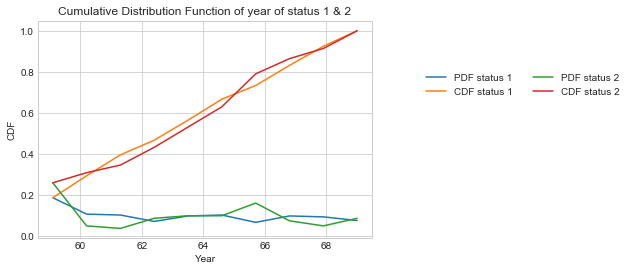

In [18]:
counts, bin_edges = np.histogram(hb_1['year'], bins = 10, density = True)
pdf = counts/sum(counts)
print("PDF for year with status 1 is: ",pdf)
print("Bin Edges: ",bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF status 1')
plt.plot(bin_edges[1:], cdf, label='CDF status 1')

counts, bin_edges = np.histogram(hb_2['year'], bins = 10, density = True)
pdf = counts/sum(counts)
print("PDF for year with status 2 is: ",pdf)
print("Bin Edges: ",bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF status 2')
plt.plot(bin_edges[1:], cdf, label='CDF status 2')
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8),  shadow=True, ncol=2)
plt.title('Cumulative Distribution Function of year of status 1 & 2')
plt.xlabel('Year')
plt.ylabel('CDF')
plt.grid(True)
plt.show()

# Conclusion

1. For status 1, out of 225 patients: 
    1. A little less than 30% patients got their surgery in 1960 and previous years.
    2. 60% patients got their surgery in 1964 and previous years.
2. For status 2, out of 81 patients:
    1. Approx. 30% patients got their surgery in 1960 and previous years.
    2. A little less than 60% patients got their surgery in 1964 and previous years.
    
We observe that same trend is followed by patients of both status 1 & 2, just that flow varies slightly before 1968 and after 1968 same number of patients got their surgery of both status 1 & 2.

PDF for nodes with status 1 is:  [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
Bin Edges:  [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
PDF for nodes with status 2 is:  [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
Bin Edges:  [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


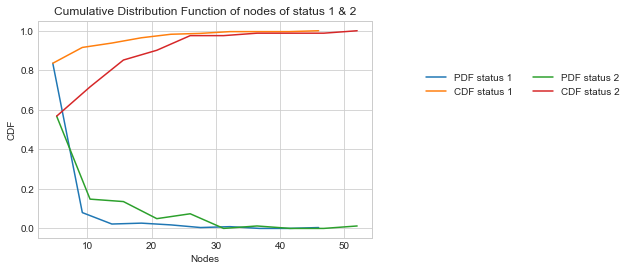

In [19]:
counts, bin_edges = np.histogram(hb_1['nodes'], bins = 10, density = True)
pdf = counts/sum(counts)
print("PDF for nodes with status 1 is: ",pdf)
print("Bin Edges: ",bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF status 1')
plt.plot(bin_edges[1:], cdf, label='CDF status 1')

counts, bin_edges = np.histogram(hb_2['nodes'], bins = 10, density = True)
pdf = counts/sum(counts)
print("PDF for nodes with status 2 is: ",pdf)
print("Bin Edges: ",bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF status 2')
plt.plot(bin_edges[1:], cdf, label='CDF status 2')
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8),  shadow=True, ncol=2)
plt.title('Cumulative Distribution Function of nodes of status 1 & 2')
plt.xlabel('Nodes')
plt.ylabel('CDF')
plt.grid(True)
plt.show()

# Conclusion

1. For status 1, out of 225 patients:
    1. 82% patients had number of nodes less than 10.
    2. In range 0.82-0.9, ie 8% patients had number of nodes equal to 10.
    3. In range 0.9-0.98, ie 8% patients had number of nodes equal to 20.
2. For status 2, out of 81 patients:
    1. 58% patients had number of nodes less than 10.
    2. In range 0.58-0.82, 24% patients had number of nodes between 10 to 20.
    3. In range 0.98 to 1, 2% patients had number of nodes between 20 to 30.

# 2.3 Boxplot and Whiskers

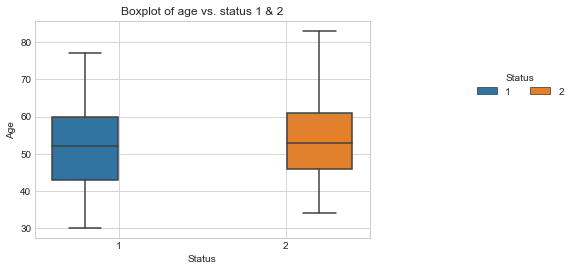

In [55]:
sns.boxplot(x='status', y='age', data=hb, hue='status')
plt.title('Boxplot of age vs. status 1 & 2')
plt.xlabel('Status')
plt.ylabel('Age')
plt.legend(title='Status', loc='upper center', bbox_to_anchor=(1.45, 0.8),  shadow=True, ncol=2)
plt.grid(True)
plt.show()

# Conclusion

1. For status 1, out of 225 patients:
    1. 25% of patients have age approx. <= 45 years.
    2. 50% of patients have age approx. <= 52 years.
    3. 75% of patients have age approx. <= 60 years.
2. For status 2, out of 81 patients:
    1. 25% of patients have age approx. <= 47 years.
    2. 50% of patients have age approx. <= 55 years.
    3. 75% of patients have age approx. <= 61 years.

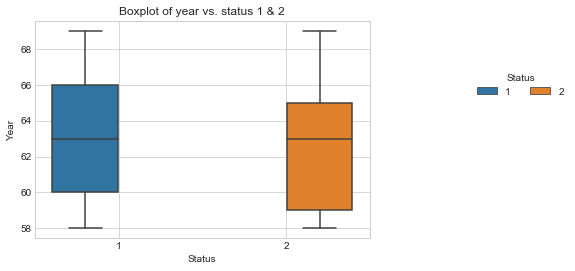

In [56]:
sns.boxplot(x='status', y='year', data=hb, hue='status')
plt.title('Boxplot of year vs. status 1 & 2')
plt.xlabel('Status')
plt.ylabel('Year')
plt.legend(title='Status', loc='upper center', bbox_to_anchor=(1.45, 0.8),  shadow=True, ncol=2)
plt.grid(True)
plt.show()

# Conclusion

1. For status 1, out of 225 patients:
    1. 25% of patients have got their surgery done in year 1960 or before.
    2. 50% of patients have got their surgery done in year 1963 or before.
    3. 75% of patients have got their surgery done in year 1966 or before.
2. For status 2, out of 81 patients:
    1. 25% of patients have got their surgery done in year 1959 or before.
    2. 50% of patients have got their surgery done in year 1963 or before.
    3. 75% of patients have got their surgery done in year 1965 or before.

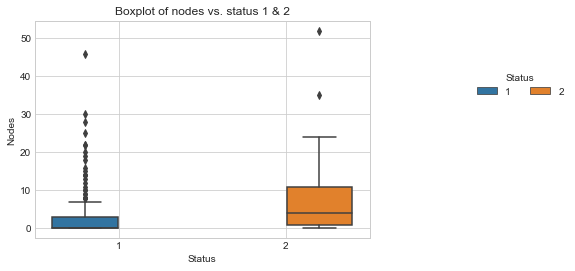

In [57]:
sns.boxplot(x='status', y='nodes', data=hb, hue='status')
plt.title('Boxplot of nodes vs. status 1 & 2')
plt.xlabel('Status')
plt.ylabel('Nodes')
plt.legend(title='Status', loc='upper center', bbox_to_anchor=(1.45, 0.8),  shadow=True, ncol=2)
plt.grid(True)
plt.show()

# Conclusion

1. For status 1, out of 225 patients:
    1. 75% of patients have number of nodes less than 5
2. For status 2, out of 81 patients:
    1. 25% of patients have number of nodes 2-3 or less.
    2. 50% of patients have number of nodes approx. 5 or less.
    3. 75% of patients have number of nodes a approx. 11 or less.

# 2.4 Violin Plots

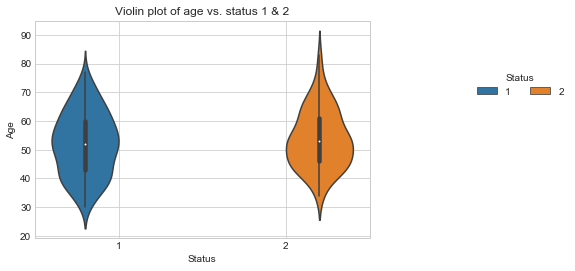

In [58]:
sns.violinplot(x='status', y='age', data=hb, size = 8, hue='status')
plt.title('Violin plot of age vs. status 1 & 2')
plt.xlabel('Status')
plt.ylabel('Age')
plt.legend(title='Status', loc='upper center', bbox_to_anchor=(1.45, 0.8),  shadow=True, ncol=2)
plt.grid(True)
plt.show()

# Conclusion

1. For status 1, out of 225 patients:
    1. 25% of patients have age approx. <= 42 years.
    2. 50% of patients have age approx. <= 52 years.
    3. 75% of patients have age approx. <= 61 years.
2. For status 2, out of 81 patients:
    1. 25% of patients have age approx. <= 46 years.
    2. 50% of patients have age approx. <= 52 years.
    3. 75% of patients have age approx. <= 61 years.

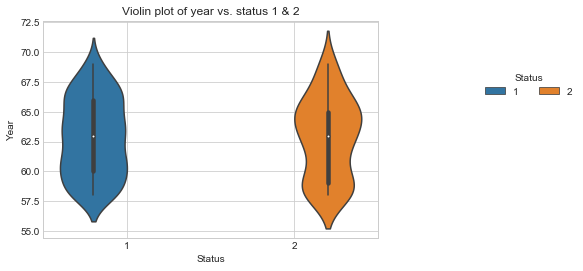

In [59]:
sns.violinplot(x='status', y='year', data=hb, size = 8, hue='status')
plt.title('Violin plot of year vs. status 1 & 2')
plt.xlabel('Status')
plt.ylabel('Year')
plt.legend(title='Status', loc='upper center', bbox_to_anchor=(1.45, 0.8),  shadow=True, ncol=2)
plt.grid(True)
plt.show()

# Conclusion
1. For status 1, out of 225 patients:
    1. 25% of patients have got their surgery done in year 1960 or before.
    2. 50% of patients have got their surgery done in year 1963 or before.
    3. 75% of patients have got their surgery done in year 1966 or before.
2. For status 2, out of 81 patients:
    1. 25% of patients have got their surgery done in year 1959 or before.
    2. 50% of patients have got their surgery done in year 1963 or before.
    3. 75% of patients have got their surgery done in year 1965 or before.

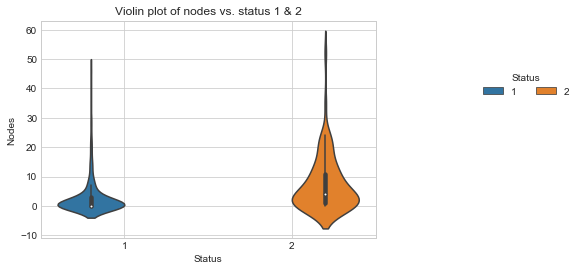

In [60]:
sns.violinplot(x='status', y='nodes', data=hb, size = 8, hue='status')
plt.title('Violin plot of nodes vs. status 1 & 2')
plt.xlabel('Status')
plt.ylabel('Nodes')
plt.legend(title='Status', loc='upper center', bbox_to_anchor=(1.45, 0.8),  shadow=True, ncol=2)
plt.grid(True)
plt.show()

# Conclusion
1. For status 1, out of 225 patients:
    1. 75% of patients have number of nodes less than 5
2. For status 2, out of 81 patients:
    1. 25% of patients have number of nodes 0.
    2. 50% of patients have number of nodes approx. 5 or less.
    3. 75% of patients have number of nodes a approx. 11 or less.

# 3. Bi-variate Analysis

# 3.1 2-D Scatter Plot

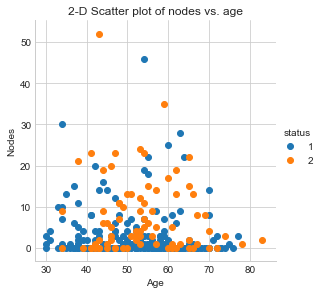

In [61]:
sns.set_style('whitegrid')
sns.FacetGrid(hb, hue = 'status', size=4).map(plt.scatter, 'age', 'nodes').add_legend()
plt.title('2-D Scatter plot of nodes vs. age')
plt.xlabel('Age')
plt.ylabel('Nodes')
plt.show()

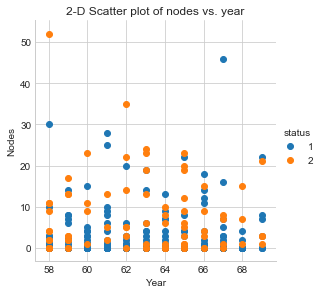

In [62]:
sns.set_style('whitegrid')
sns.FacetGrid(hb, hue = 'status', size=4).map(plt.scatter, 'year', 'nodes').add_legend()
plt.title('2-D Scatter plot of nodes vs. year')
plt.xlabel('Year')
plt.ylabel('Nodes')
plt.show()

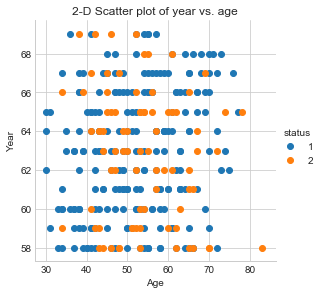

In [63]:
sns.set_style('whitegrid')
sns.FacetGrid(hb, hue = 'status', size=4).map(plt.scatter, 'age', 'year').add_legend()
plt.title('2-D Scatter plot of year vs. age')
plt.xlabel('Age')
plt.ylabel('Year')
plt.show()

# Conclusion

For all the three 2-D scatter plots, the data points are so scattered, that it is difficult to separate them on the plot. So none of the features could be separated by drawing a line on the plot. No feature can help in classifying the datapoints as class 1 or 2.

# 3.2 Pair plot

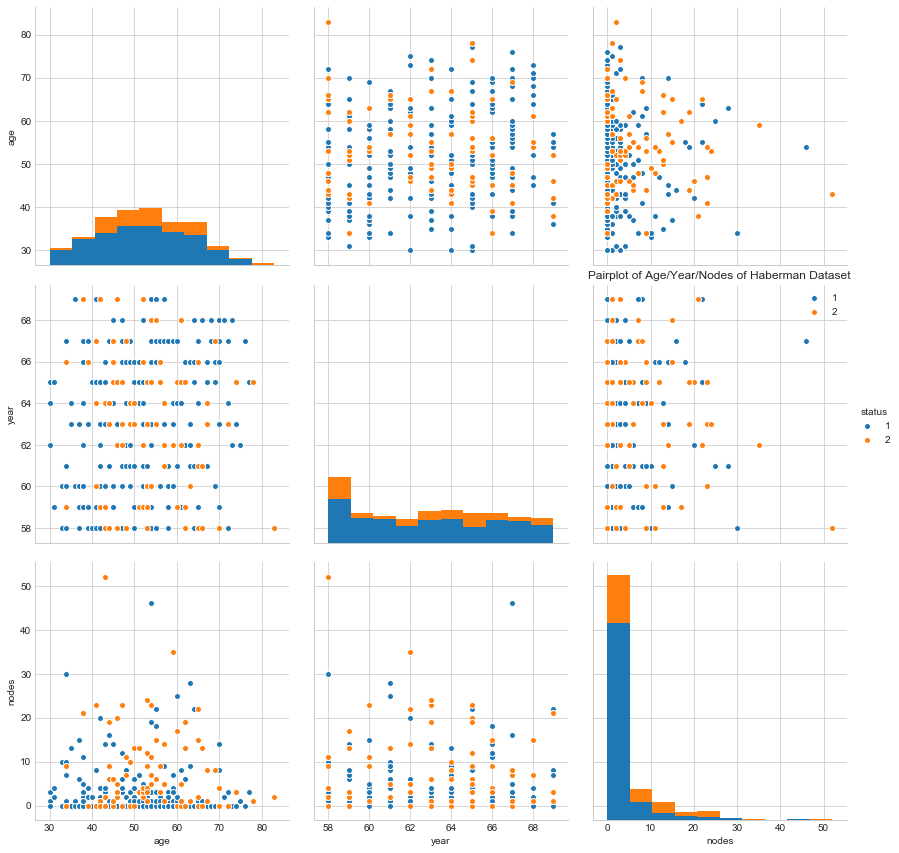

In [67]:
sns.set_style('whitegrid')
sns.pairplot(hb, hue='status', vars=['age', 'year', 'nodes'], size=4)
plt.title('Pairplot of Age/Year/Nodes of Haberman Dataset')
plt.legend()
plt.show()

# Conclusion

For the pairplots, the data points are so scattered, that it is difficult to separate them on the plot. So none of the features could be separated by drawing a line on the plot. No feature can help in classifying the datapoints as class 1 or 2.



# Summary

Haberman dataset is an imbalanced dataset, where class 1 has 225 entries and class 2 has 81 entries. PDF of age shows that in the age group of 50 the maximum patients belonged to class 2. PDF of year shows that in 1964, maximum patients got surgery belonged to class 2. PDF of nodes shows that maximum number of people having nodes 0 belonged to class 1.

CDF results showed that both class 1 & 2 patients had 40% patients with age <=50years and 75% patients age <=60years. Between 1960-64, about 30%-60% patients got their surgery done. In class 1, 82% patients had nodes equal to 0, while class 2 had 58% patients nodes less that 10.

Boxplot results showed that for class 1 and class 2 combined, patients age varied between 45 years to 61 years and they got their surgeries done between 1960-66. For class 1 75% patients had nodes less than 5 while class 2 had 11 or less nodes.

Violin plot results showed that patients age varied between 42 years to 61 years and they got their surgeries done between 1960-66. For class 1 75% patients had nodes less than 5 while class 2 had 11 or less nodes.

It is difficult to separate the datapoints on the plot. So none of the features could be separated by drawing a line on the plot. No feature can help in classifying the datapoints as class 1 or 2.